In [1]:
from maelzel.core import *
from maelzel.core import symbols

Chain([4C:1♩, 4D:0.5♩, 4E:1♩:offset=3])
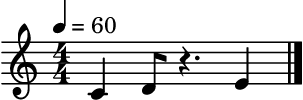

In [2]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch

In [3]:
assert all(item.parent is ch for item in ch.items)

In [4]:
ch.splitEventsAtOffsets([0.5])
ch.dump()

Chain([4C~:0.5♩, 4C:0.5♩:symbols=[NoMerge()], 4D:0.5♩, 4E:1♩:offset=3])
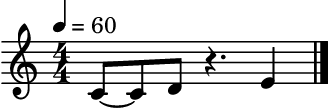

In [5]:
ch.items[1].addSymbol(symbols.NoMerge())
ch

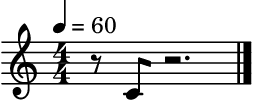

Chain([4C~:0.5♩, 4C:0.5♩, 4D:0.5♩, 4E:1♩:offset=3])
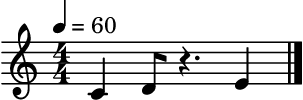

In [3]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch.dump()

ev = ch.eventAt(0.5, split=True)
ch.removeRedundantOffsets()
ch.dump()
ev.show()
ch

In [7]:
assert all(item.parent is ch for item in ch.items)

4E:0.95♩
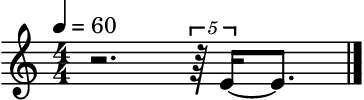

In [8]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])

ev = ch.eventAt(3.05, split=True)
ev

Chain([4C:1♩, 4D:0.5♩, 4E:1♩:offset=3, Chain([4C:1♩, 4D:0.5♩])])
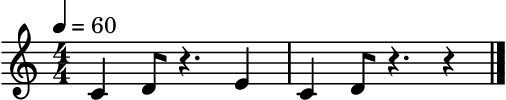

In [9]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch

Chain([4C:1♩:offset=0, 4D:0.5♩:offset=1, 4E:1♩:offset=3, Chain([4C:1♩:offset=0, 4D:0.5♩:offset=1], offset=4)])
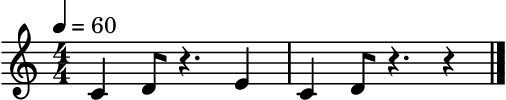

In [10]:
ch2 = ch.copy()
ch2.stack()
ch2.dump()
ch2


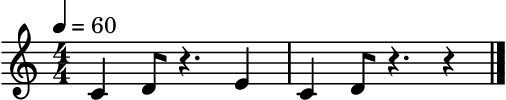

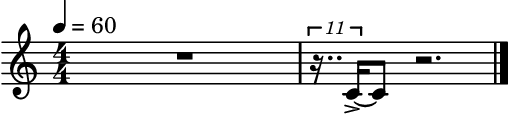

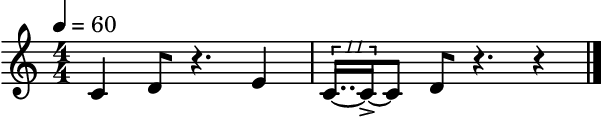

In [11]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ev = ch2.eventAt((1, 0.32), split=True)
ev.addSymbol('accent')
ev.show()
ch2.show()

#ch2.dump()
#ev.show()
#ch2.show()

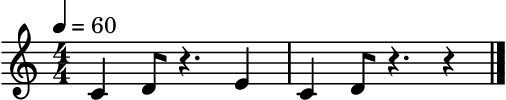

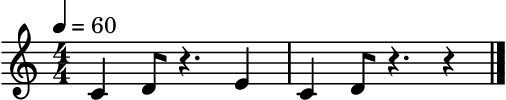

In [12]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ch2.splitAt(3.5)
ch2.show()
ch2.dump()


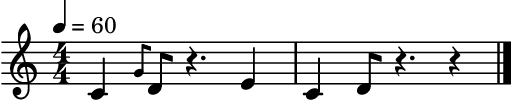

In [13]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()


In [14]:
ch.eventsBetween(3, 5)

[4E:1♩:offset=3, 4C:1♩]

In [15]:
ch.itemsBetween(3, 5)

[4E:1♩:offset=3, Chain([4C:1♩, 4D:0.5♩])]

Chain([4E:1♩, Chain([4C:1♩])], offset=3)
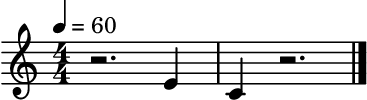

In [16]:
ch2 = ch.cropped(3, 5)
ch2.dump()
ch2

Chain([4E:1♩, Chain([4C:1♩])], offset=3)
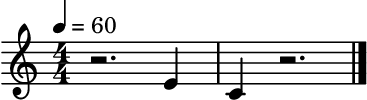

In [17]:
ch3 = ch2.copy()
ch3.absorbInitialOffset()
ch3.dump()
ch3

Chain([4E:1♩:offset=3, Chain([4C:1♩])])
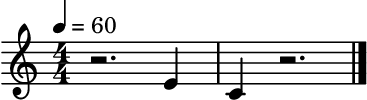

In [18]:
ch3.cropped(0, 10)

The events returned by eventsBetween are the actual events of the chain. Their offset is due to their position within the chain. Outside of it they lose this absolute position.

Also notice that within a chain items are unique. The same item cannot be shared between chains. When events wich already have a parent are used within another chain, a copy is made.

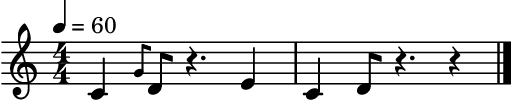

4C:1♩ 4 Chain([4C:1♩, 4D:0.5♩])
4D:0.5♩ 5 Chain([4C:1♩, 4D:0.5♩])


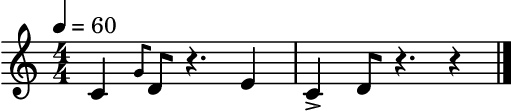

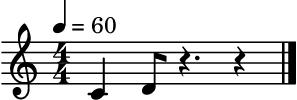

In [2]:
ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()
events = ch.eventsBetween(4, 6)
for ev in events:
    print(ev, ev.absOffset(), ev.parent)
ch2 = Chain(events)
events[0].addSymbol('accent')
ch.show()
ch2.show()

To prevent the change in offset it is necessary to set the explicit offsets, either by flattening the chain or by calling eventsWithOffset

Chain([4C:1♩:offset=0, 4G:offset=1, 4D:0.5♩:offset=1, 4E:1♩:offset=3, 4C:1♩:offset=4, 4D:0.5♩:offset=5])
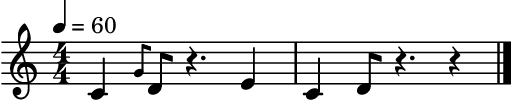

In [3]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch2 = ch.flat()
ch2
# Chain(ch2.eventsBetween(4, 6))

Chain([4C:1♩:offset=4, 4D:0.5♩:offset=5])
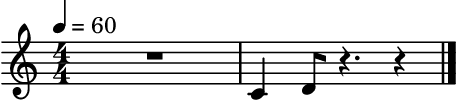

In [4]:
events = [ev.clone(offset=offset) for ev, offset in ch.eventsWithOffset(4, 6)]
Chain(events)


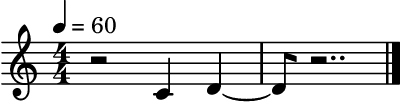

start=2, end=4


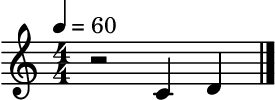

start=3, end=4


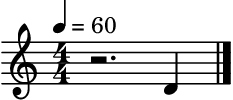

start=3.5, end=8


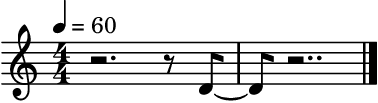

start=6, end=8


In [5]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:1.5",
])
ch.dump()
ch.show()
for start, end in [(2, 4), (3, 4), (3.5, 8), (6, 8)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        ch2.dump()
        ch2.show()


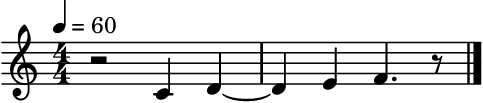

start=1, end=4


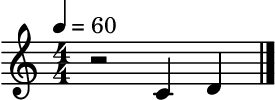

start=3, end=4


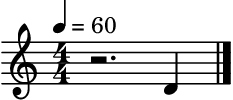

start=3.5, end=8


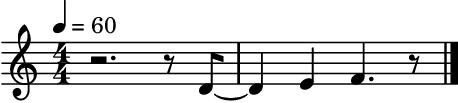

start=4.25, end=7


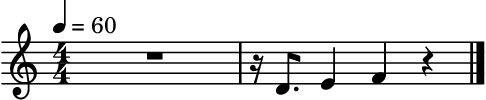

In [6]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E:1",
        "4F:1.5"
    ])
])
ch.dump()
ch.show()
for start, end in [(1, 4), (3, 4), (3.5, 8), (4.25, 7)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        ch2.dump()
        ch2.show()


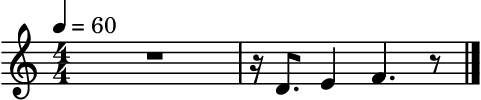

In [7]:
from maelzel.core import *
ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E",
        "4F:1.5"
    ])
])
ch2 = ch.cropped(4.25, 8)
v = ch2.flat().asVoice()
v.dump()
v.show()

In [8]:
%timeit ch2.flat().asVoice()

89.6 μs ± 1.55 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%prun a = [ch2.flat().asVoice() for _ in range(1000)]

         268174 function calls (268111 primitive calls) in 0.302 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
55193/55136    0.028    0.000    0.053    0.000 {built-in method builtins.isinstance}
     6000    0.021    0.000    0.052    0.000 event.py:119(__init__)
     3000    0.021    0.000    0.040    0.000 chain.py:39(_stackEvents)
     2000    0.018    0.000    0.042    0.000 chain.py:134(__init__)
     1000    0.018    0.000    0.211    0.000 chain.py:960(asVoice)
     3000    0.015    0.000    0.048    0.000 event.py:372(clone)
     8000    0.015    0.000    0.015    0.000 mobj.py:131(__init__)
     1000    0.014    0.000    0.098    0.000 chain.py:438(flat)
    27000    0.014    0.000    0.014    0.000 {built-in method _abc._abc_instancecheck}
     1000    0.012    0.000    0.019    0.000 chain.py:74(_removeRedundantOffsets)
    27000    0.012    0.000    0.026    0.000 <frozen abc>:117(__instancecheck__)
     200